In [2]:
err = 0 
carry = 0b1000
#print("a", "b", "|", "+" , "o", "e")
#print("-------------")
for a in range(16):
    for b in range(16):
        lor = a|b
        if(carry&a&b == carry): 
            lor=lor+0b10000
        err = err + ((a+b) - lor)
        #print(a, b, "|", (a+b) , lor, (a+b) - lor)
print("Mean:" ,err/(16*16))

Mean: -0.25


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
from scipy.stats import norm
from scipy.interpolate import interp1d
import scipy.stats as st

def aprx_add (a, b, bits):
    carry = 1<<(bits-1);
    lor = a|b
    if(carry&a&b == carry): 
        lor=lor+(carry<<1)
        
    return lor

More nums error: 0.25


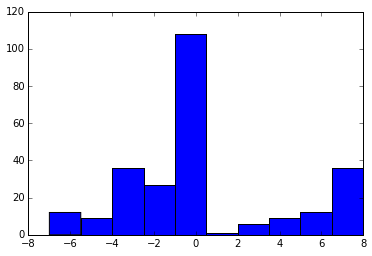

In [13]:
aprx_all = []
add_all = []
for a in range(16): 
    for b in range(16):
        aprx_all = aprx_all +  [aprx_add(a, b, 4)]
        add_all = add_all + [a+b]
error = np.asarray(aprx_all) - np.asarray(add_all)
n, bins, patches = plt.hist(error)
print("More nums error:", np.mean(error))

In [17]:
NUM_RUNS = 500
nums_rand = np.random.rand(NUM_RUNS)
nums_rand = nums_rand * pow(2, 16)
nums_rand = nums_rand.astype(np.uint32)

mask_l = 0x0000ffff
mask_u = 0xffff0000

add_num = 0
aprox_num = 0

for curr_num in nums_rand:
    add_num = add_num + curr_num
    
    masked_sum = aprox_num & mask_l
    aprox_num = (aprox_num & mask_u) + aprx_add(masked_sum, curr_num, 16)

print ("Multiple Approx Adds in a Row:")
print ("Nums:",add_num, aprox_num)
print("Err:",(add_num.astype(int) - aprox_num.astype(int)).astype(int))
print ("Percent Err:",(add_num-aprox_num)/add_num)

Multiple Approx Adds in a Row:
Nums: 15985824 15794175
Err: 191649
Percent Err: 0.0119886844744


Mean= 36.87585
Add: [3806257984] Aprox: [3806257151] Err: [833] Err Plotted: [-833]


/home/emily/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:19: RuntimeWarning: overflow encountered in uint_scalars


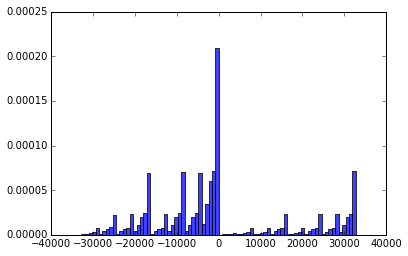

In [3]:
NUM_RUNS = 1000000
nums_a = np.random.rand(NUM_RUNS)
nums_a = nums_a * (pow(2, 32))
nums_a = nums_a.astype(np.uint32)

nums_b = np.random.rand(NUM_RUNS)
nums_b = nums_b * (pow(2, 32))
nums_b = nums_b.astype(np.uint32)

ans_lor= np.zeros([NUM_RUNS,1], dtype=np.uint32) 
ans_add= np.zeros([NUM_RUNS,1], dtype=np.uint32) 
mask_l = 0x0000ffff
mask_u = 0xffff0000

for i in range(NUM_RUNS):
    lower = aprx_add(nums_a[i]&mask_l, nums_b[i]&mask_l, 16)
    upper = (nums_a[i]&mask_u) + (nums_b[i]&mask_u)
    ans_lor[i] = lower + upper
    ans_add[i] = nums_a[i] + nums_b[i]
    #print(format(nums_a[i],'x'))
    #print(format(nums_b[i],'x'))
    #print("")
    #print(format(upper,'x') , format(lower,'x'))
    #print(format(ans_lor[i,0],'x'))
    #print(format(ans_add[i,0],'x'))
    #print("")
    
data_in = (ans_lor.astype(int) - ans_add.astype(int)).astype(int)#/ans_add.astype(int)
for i in np.where(data_in>4000000000)[0]:
    data_in[i] = 0 

(mu, sigma) = norm.fit(data_in)
# the histogram of the data
n, bins, patches = plt.hist(data_in, 80, normed=1, facecolor='green', alpha=0.75)

#plot
plt.xlabel('Error')
plt.ylabel('Error Occurence')
plt.show()

print("Mean=",mu)
print("Add:",ans_add[1],"Aprox:", ans_lor[1],"Err:", ans_add[1]- ans_lor[1],"Err Plotted:", data_in[1])

In [16]:
b = np.bincount(data_in.flatten(), 80)
p = b / float(b.sum())

(mu, sigma) = norm.fit(data_in)
# the histogram of the data
#n, bins, patches = plt.hist(data_in, 80, normed=1, facecolor='blue', alpha=0.5)
plt.bar(np.arange(len(b)) - 0.5, p, facecolor='blue', alpha=0.5)

#plot
plt.xlabel('(Approx - Accurate) Error')
plt.ylabel('Error Occurence')
plt.show()

print("Mean=",mu)
print("Add:",ans_add[1],"Aprox:", ans_lor[1],"Err:", ans_add[1]- ans_lor[1],"Err Plotted:", data_in[1])

ValueError: The first argument of bincount must be non-negative

In [76]:
f = interp1d(bins[1:], n, kind='linear')
xnew = np.linspace(bins[1], bins[-1], num=1000, endpoint=True)

class my_pdf(st.rv_continuous):
    def _pdf(self,x):
        return f(x)  # Normalized over its range, in this case [0,1]
    
my_cv = my_pdf(a=0, b=1, name='my_pdf')

In [78]:
test_f = my_cv.rvs(size=100)

#plt.hist(test_f, 10, normed=1, facecolor='green', alpha=0.75)

In [ ]:
class my_pdf(st.rv_continuous):
    def _pdf(self,x):
        return 3*x**2  # Normalized over its range, in this case [0,1]

my_cv = my_pdf(a=0, b=1, name='my_pdf')

In [19]:
i = 7
print("Add:",ans_add[i],"Aprox:", ans_lor[i],"Err:", ans_lor[i]- ans_add[i],"Err Plotted:", data_in[i])
for i in np.where(data_in>4000000000)[0]:
    data_in[i] = 0 
    
np.mean(data_in)


Add: [1034952018] Aprox: [1034942286] Err: [4294957564] Err Plotted: [-9732]


1.5690299999999999

In [20]:
print(pow(2,16)-1)
print((pow(2,16)-1)*2)
i = 1
print("")
a = 0x8003
b = 0x8003
print(format(a, 'b'))
print(format(b, 'b'))
print("")
lor = aprx_add(a, b, 16)
print(format(lor, 'b'))
print("add=", a + b)

65535
131070

1000000000000011
1000000000000011

11000000000000011
add= 65542


In [23]:
a = []
b = [1,1]
c = [1,2]
a.append(b)
a.append(b)
print(a)

[[1, 1], [1, 1]]


In [59]:
a = np.array(range(100))
b = a[:2*3].reshape(2,3)
b

array([[0, 1, 2],
       [3, 4, 5]])

In [ ]:
20, 24, 24 kernel=5
50, 8, 8 kernel=5
100, 500